In [1]:
%load_ext autoreload
%autoreload 2

from sed import SedProcessor
import sed
import numpy as np

# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt

# Try to calibrate energy

## Spin-integrated branch, E_TOF=10eV
single scan, move sample bias manually every 2000 pulses.

In [20]:
sp = SedProcessor(runs=[44638], config={"core": {"paths": {"data_raw_dir": "../../flash_test_data/fl1user3/", "data_parquet_dir": "../../flash_test_data/parquet/"}}}, system_config="config_flash_energy_calib.yaml")

Folder config loaded from: [/mnt/pcshare/users/Laurenz/AreaB/sed/sed/tutorial/sed_config.yaml]
System config loaded from: [/mnt/pcshare/users/Laurenz/AreaB/sed/sed/tutorial/config_flash_energy_calib.yaml]
Default config loaded from: [/mnt/pcshare/users/Laurenz/AreaB/sed/sed/sed/config/default.yaml]
Reading files: 3 new files of 3 total.


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   58.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   58.6s finished


RuntimeError: Conversion failed for some files. [KeyError(['dldTimeSteps']), KeyError(['dldTimeSteps']), KeyError(['dldTimeSteps'])]

In [19]:
sp.add_jitter()

ValueError: Metadata inference failed in `apply_jitter`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
KeyError('dldTimeSteps')

Traceback:
---------
  File "/mnt/pcshare/users/Laurenz/AreaB/sed/.pyenv/lib/python3.8/site-packages/dask/dataframe/utils.py", line 192, in raise_on_meta_error
    yield
  File "/mnt/pcshare/users/Laurenz/AreaB/sed/.pyenv/lib/python3.8/site-packages/dask/dataframe/core.py", line 6782, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/mnt/pcshare/users/Laurenz/AreaB/sed/sed/sed/core/dfops.py", line 68, in apply_jitter
    df[col_jittered] = df[col] + amp * jitter
  File "/mnt/pcshare/users/Laurenz/AreaB/sed/.pyenv/lib/python3.8/site-packages/pandas/core/frame.py", line 3804, in __getitem__
    indexer = self.columns.get_loc(key)
  File "/mnt/pcshare/users/Laurenz/AreaB/sed/.pyenv/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    raise KeyError(key) from err


In [8]:
axes = ['sampleBias', 'dldTime']
bins = [6, 500]
ranges = [[0,6], [40000, 55000]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
sp.load_bias_series(binned_data=res)

interactive(children=(IntSlider(value=3, description='refid', max=10), IntRangeSlider(value=(44500, 46000), de…

Button(description='apply', style=ButtonStyle())

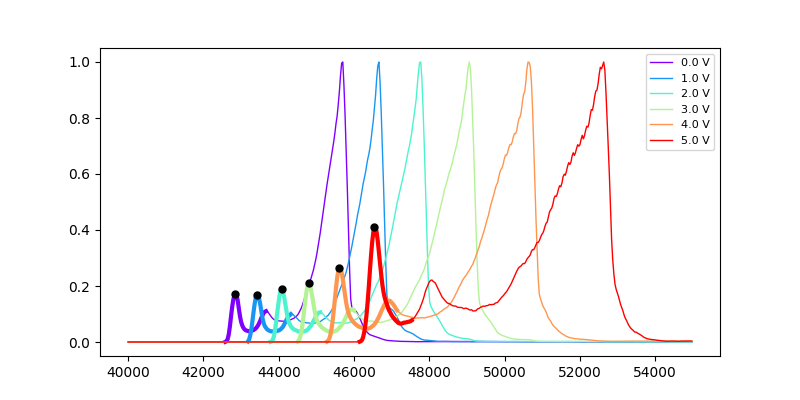

In [10]:
ranges=(44500, 46000)
ref_id=3
sp.find_bias_peaks(ranges=ranges, ref_id=ref_id)

Quality of Calibration:


E/TOF relationship:


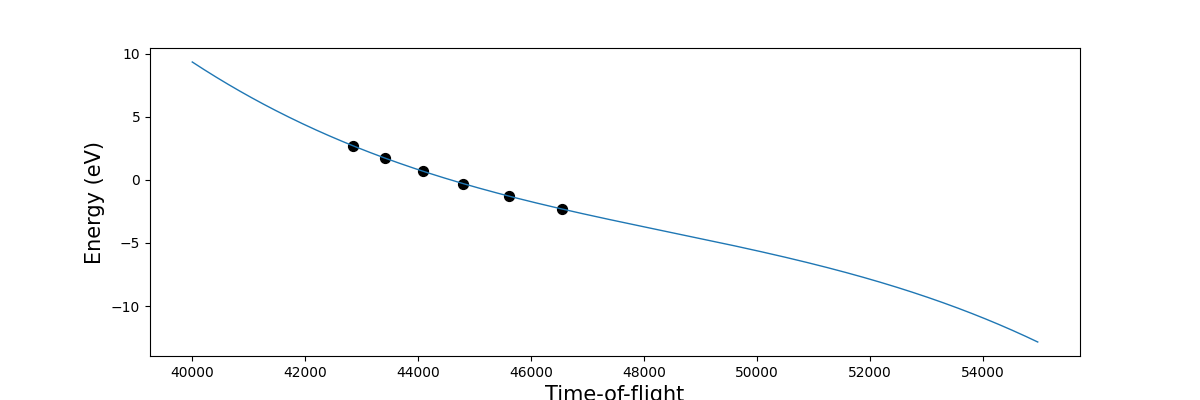

In [11]:
ref_id=3
ref_energy=-.3
sp.calibrate_energy_axis(ref_id=ref_id, ref_energy=ref_energy, method="lstsq", order=3)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 6
    # variables        = 3
    chi-square         = 3.2422e-04
    reduced chi-square = 1.0807e-04
    Akaike info crit   = -52.9551731
    Bayesian info crit = -53.5798947
[[Variables]]
    d:   1.32138456 +/- 0.05835765 (4.42%) (init = 1)
    t0:  8.4773e-07 +/- 1.8222e-08 (2.15%) (init = 1e-06)
    E0: -15.4833228 +/- 0.37758140 (2.44%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(d, t0)  = -1.000
    C(d, E0)  = -0.998
    C(t0, E0) = 0.996
Quality of Calibration:


E/TOF relationship:


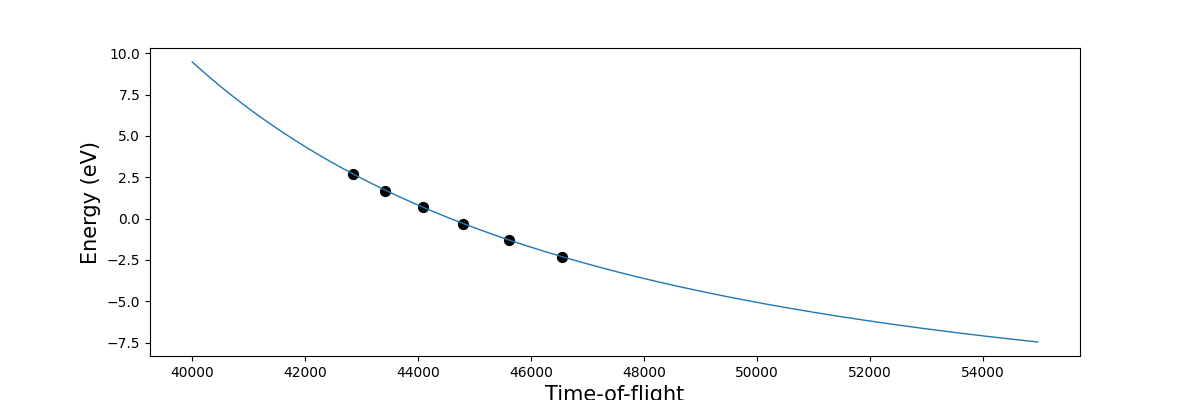

In [12]:
ref_id=3
ref_energy=-.3
sp.calibrate_energy_axis(ref_id=ref_id, ref_energy=ref_energy, method="lmfit")

In [13]:
sp.append_energy_axis(preview=True)

Adding energy column to dataframe:
      trainId  pulseId  electronId     timeStamp     dldPosX     dldPosY  \
0  1640388889        3           0  1.678800e+09  624.282613  650.282613   
1  1640388889        3           1  1.678800e+09  624.636437  646.636437   
2  1640388889        4           0  1.678800e+09  684.198502  663.198502   
3  1640388889        4           1  1.678800e+09  685.114657  680.114657   
4  1640388889        4           2  1.678800e+09  686.442973  662.442973   
5  1640388889        4           3  1.678800e+09  681.727714  644.727714   
6  1640388889        6           0  1.678800e+09  656.754474  672.754474   
7  1640388889        8           0  1.678800e+09  705.136128  812.136128   
8  1640388889        8           1  1.678800e+09  710.309368  814.309368   
9  1640388889       16           0  1.678800e+09  675.043822  689.043822   

        dldTime  cryoTemperature  crystalVoltage  dldTimeBinSize  ...  \
0  45689.282613        301.76001       -0.001524       

In [14]:
axes = ['sampleBias', 'energy']
bins = [6, 1000]
ranges = [[0,6], [-5, 5]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

  0%|          | 0/1 [00:00<?, ?it/s]

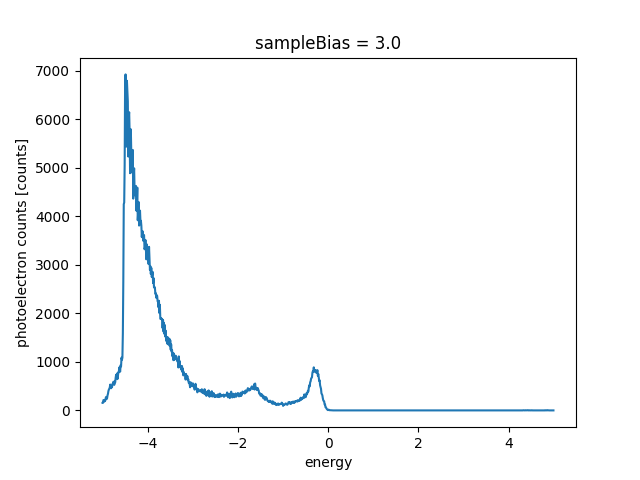

In [15]:
plt.figure()
res[3,:].plot()

In [16]:
axes = ['sampleBias', 'energy', 'dldPosX']
bins = [6, 100, 480]
ranges = [[0,6], [-2, 1], [420,900]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

  0%|          | 0/1 [00:00<?, ?it/s]

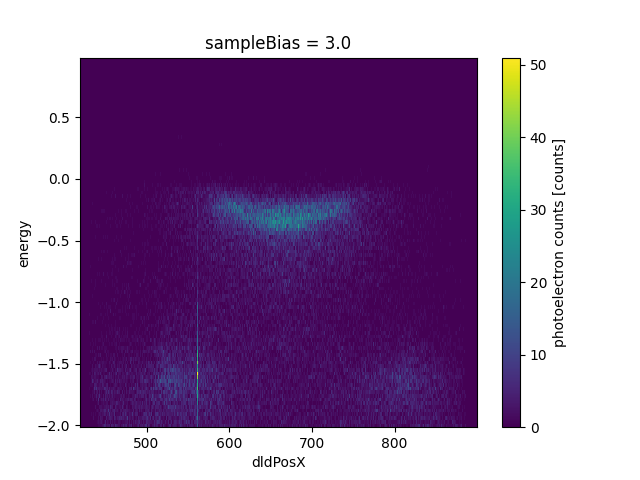

In [17]:
plt.figure()
res[3, :, :].plot()